In [2825]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE

In [2826]:
df_train = pd.read_csv("train.csv")
df_train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [2827]:
df_train[df_train['CoapplicantIncome']==0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
15,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [2828]:
df_train['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [2829]:
df_train.shape

(614, 13)

In [2830]:
df_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [2831]:
df_train.groupby('Gender')['Loan_Status'].count()

Gender
Female    112
Male      489
Name: Loan_Status, dtype: int64

In [2832]:
df_train['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [2833]:
df_train[df_train['Loan_Amount_Term'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [2834]:
df_test = pd.read_csv("test.csv")
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [2835]:
df_test.shape

(367, 12)

### Exploratory data analysis

In [2836]:
# lets check for null values but lest concate both dataset first
#df = pd.concat([df_train,df_test])
#df.head()

In [2837]:
#df.shape

In [2838]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [2839]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [2840]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [2841]:
#df.drop(['CoapplicantIncome'],axis=1,inplace=True)

In [2842]:
#lets work on categorical variables and identify all of them
cat_vars1 = [feature for feature in df_train.columns if df_train[feature].dtypes == 'O' and feature !='Loan_Status']
cat_vars1
cat_vars2 = [feature for feature in df_test.columns if df_test[feature].dtypes == 'O' and feature !='Loan_Status']
cat_vars2

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [2843]:
df_train['Gender'].fillna('Female',inplace=True)
df_test['Gender'].fillna('Female',inplace=True)

In [2844]:
# lets impute all those except loan status with mode values for null values
#df[cat_vars] = df[cat_vars].fillna(df[cat_vars].mode()[0])
for feat in cat_vars1:
    df_train[feat]= df_train[feat].fillna(df_train[feat].mode()[0])
for feat in cat_vars2:
    df_test[feat]= df_test[feat].fillna(df_test[feat].mode()[0])

In [2845]:
df_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [2846]:
df_test.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [2847]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [2848]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2849]:
# lets find numerical variables
num_vars1 = [feature for feature in df_train.columns if df_train[feature].dtypes != 'O' and feature !='Loan_Status']
num_vars1
num_vars2 = [feature for feature in df_test.columns if df_test[feature].dtypes != 'O' and feature !='Loan_Status']
num_vars2

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [2850]:
df_train['Credit_History'] = df_train['Credit_History'].fillna(2)
df_test['Credit_History'] = df_test['Credit_History'].fillna(2)

In [2851]:
df_train[num_vars].isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
dtype: int64

In [2852]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


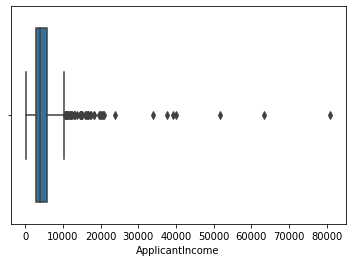

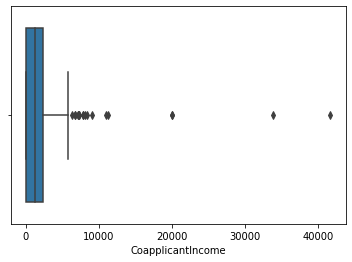

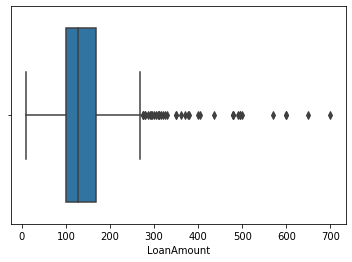

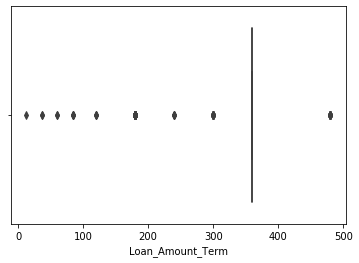

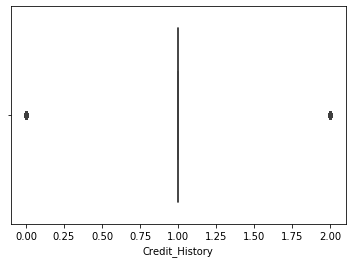

In [2853]:
for feat in num_vars1:
    sns.boxplot(df_train[feat])
    plt.show()

In [2854]:
# data is not much and and it is not giving any clear indication
# lets impute with median as there seems to be outliers
df_train[num_vars1] = df_train[num_vars1].fillna(df_train[num_vars1].median())
df_test[num_vars2] = df_test[num_vars2].fillna(df_test[num_vars2].median())

In [2855]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,2.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [2856]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [2857]:
df_train['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [2858]:
df_train.groupby(['Dependents'])['Loan_Status'].count()

Dependents
0     360
1     102
2     101
3+     51
Name: Loan_Status, dtype: int64

In [2859]:
df_train['Dependents']= df_train['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
#df['Dependents']= df['Dependents'].map({'0':'No_Dep','1':'OneR1+_Dep','2':'OneR1+_Dep','3+':'OneR1+_Dep'})
df_train['Loan_Status']= df_train['Loan_Status'].map({'Y':1,'N':0})
df_train['Gender']= df_train['Gender'].map({'Male':1,'Female':0})
df_train['Married']= df_train['Married'].map({'Yes':1,'No':0})
df_train['Self_Employed']= df_train['Self_Employed'].map({'Yes':1,'No':0})
df_train['Education']= df_train['Education'].map({'Graduate':1,'Not Graduate':0})
df_train['Property_Area']= df_train['Property_Area'].map({'Urban':0,'Semiurban':1,'Rural':2})

In [2860]:
df_test['Dependents']= df_test['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
#df['Dependents']= df['Dependents'].map({'0':'No_Dep','1':'OneR1+_Dep','2':'OneR1+_Dep','3+':'OneR1+_Dep'})
#df_test['Loan_Status']= df_test['Loan_Status'].map({'Y':1,'N':0})
df_test['Gender']= df_test['Gender'].map({'Male':1,'Female':0})
df_test['Married']= df_test['Married'].map({'Yes':1,'No':0})
df_test['Self_Employed']= df_test['Self_Employed'].map({'Yes':1,'No':0})
df_test['Education']= df_test['Education'].map({'Graduate':1,'Not Graduate':0})
df_test['Property_Area']= df_test['Property_Area'].map({'Urban':0,'Semiurban':1,'Rural':2})

In [2861]:
#df.groupby('Credit_History')['Loan_Status'].sum()

In [2862]:
#df.groupby('Credit_History')['Loan_Status'].count()

In [2863]:
#df.groupby('Self_Employed')['Loan_Status'].sum()

In [2864]:
#lets get the dummy vars for categorical variables
#df = pd.concat([df, pd.get_dummies(df['Married'],drop_first=True)],axis=1).drop('Married',axis=1)
#df = pd.concat([df, pd.get_dummies(df['Gender'],drop_first=True)],axis=1).drop('Gender',axis=1)
#df = pd.concat([df, pd.get_dummies(df['Dependents'],drop_first=True)],axis=1).drop('Dependents',axis=1)
#df = pd.concat([df, pd.get_dummies(df['Education'],drop_first=True)],axis=1).drop('Education',axis=1)
#df = pd.concat([df, pd.get_dummies(df['Self_Employed'],drop_first=True)],axis=1).drop('Self_Employed',axis=1)
#df = pd.concat([df, pd.get_dummies(df['Property_Area'],drop_first=True)],axis=1).drop('Property_Area',axis=1)

In [2865]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 62.5+ KB


In [2866]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,0
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,0
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,0
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,2.0,0
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,0


In [2867]:
df_train['Total_Inc'] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']
df_train['Total_Inc'] = np.log(df_train['Total_Inc'])
#df_train['Debt_Income_Ratio'] = df_train['Total_Inc'] / df_train['LoanAmount']
#df_train['EMI'] = (df_train['LoanAmount']*0.09*(1.09**df_train['Loan_Amount_Term']))/(1.09**df_train['Loan_Amount_Term']-1)


In [2868]:
df_train.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)
#df_train.drop(['Total_Inc','LoanAmount','Loan_Amount_Term'],axis=1,inplace=True)

In [2869]:
df_test['Total_Inc'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']
df_test['Total_Inc'] = np.log(df_test['Total_Inc'])
#df_test['Debt_Income_Ratio'] = df_test['Total_Inc'] / df_test['LoanAmount']
#df_test['EMI'] = (df_test['LoanAmount']*0.09*(1.09**df_test['Loan_Amount_Term']))/(1.09**df_test['Loan_Amount_Term']-1)
#df_test['Total_Inc'] = np.log(df_test['Total_Inc'])

In [2870]:
df_test.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)
#df_test.drop(['Total_Inc','LoanAmount','Loan_Amount_Term'],axis=1,inplace=True)

In [2871]:
#df_train = df[:614]
#df_test = df[614:]

In [2872]:
df_1 = df_train.copy()

In [2873]:
df_train.drop(['Loan_ID'],inplace=True,axis=1)

In [2874]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Inc
0,1,0,0,1,0,128.0,360.0,1.0,0,1,8.674026
1,1,1,1,1,0,128.0,360.0,1.0,2,0,8.714568
2,1,1,0,1,1,66.0,360.0,1.0,0,1,8.006368
3,1,1,0,0,0,120.0,360.0,1.0,0,1,8.505323
4,1,0,0,1,0,141.0,360.0,1.0,0,1,8.699515


In [2875]:
X = df_train.drop('Loan_Status',axis=1)
y = df_train['Loan_Status']

In [2876]:
# Rerunning above with resampled data

#sm = SMOTE(random_state=1, ratio = 1)
#X_train_res, y_train_res = sm.fit_sample(X, y)

In [2877]:
X.shape

(614, 10)

### train test split

In [2878]:
# Normalize using MinMaxScaler to constrain values to between 0 and 1.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#scaler.fit(X_train_res)
scaler.fit(X)
X_train = scaler.transform(X)

In [2879]:
#X_train = pd.DataFrame(X_train,columns=X.columns)
#X_train.head()

In [2880]:
# Create first pipeline for base without reducing features.

pipe = Pipeline([('classifier' , RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(5,15,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   10.3s finished


In [2881]:
best_clf.best_estimator_.get_params()['classifier']

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [2882]:
print('Model accuracy is',best_clf.score(X_train, y))

Model accuracy is 0.9976303317535545


In [2883]:
test = df_test.copy()

In [2884]:
df_test.drop(['Loan_ID'],axis=1,inplace=True)

In [2885]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Inc
0,1,1,0,1,0,110.0,360.0,1.0,0,8.651724
1,1,1,1,1,0,126.0,360.0,1.0,0,8.428581
2,1,1,2,1,0,208.0,360.0,1.0,0,8.824678
3,1,1,2,1,0,100.0,360.0,2.0,0,8.494129
4,1,0,0,0,0,78.0,360.0,1.0,0,8.094378


In [2886]:
X_test = scaler.transform(df_test)

In [2887]:
clf = LogisticRegression()
clf.fit(X_train, y)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train,y) * 100, 2)
print ("Train Accuracy: " + str(acc_log_reg) + '%')

Train Accuracy: 72.99%


In [2812]:
clf = SVC()
clf.fit(X_train, y)
y_pred_SVC = clf.predict(X_test)
acc_svc = round( clf.score(X_train, y) * 100, 2)
print ("Train Accuracy: " + str(acc_svc) + '%')

Train Accuracy: 82.08%


In [2813]:
clf = LinearSVC()
clf.fit(X_train, y)
y_pred_linearsvc = clf.predict(X_test)
acc_linear_svc = round( clf.score(X_train, y) * 100, 2)
print ("Train Accuracy: " + str(acc_linear_svc) + '%')

Train Accuracy: 80.94%


In [2814]:
clf = KNeighborsClassifier(n_neighbors = 4)
clf.fit(X_train, y)
y_pred_knn = clf.predict(X_test)
acc_knn = round( clf.score(X_train, y) * 100, 2) 
print ("Train Accuracy: " + str(acc_knn) + '%')

Train Accuracy: 81.76%


In [2815]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y)
y_pred_DT = clf.predict(X_test)
acc_decision_tree = round( clf.score(X_train, y) * 100, 2)
print ("Train Accuracy: " + str(acc_decision_tree) + '%')

Train Accuracy: 100.0%


In [2816]:
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round( clf.score(X_train, y) * 100, 2)
print ("Train Accuracy: " + str(acc_random_forest) + '%')

Train Accuracy: 100.0%


In [2817]:
clf = GaussianNB()
clf.fit(X_train, y)
y_pred_GB = clf.predict(X_test)
acc_gnb = round( clf.score(X_train, y) * 100, 2)
print ("Train Accuracy: " + str(acc_gnb) + '%')

Train Accuracy: 78.5%


In [2818]:
clf = Perceptron(max_iter=6, tol=None)
clf.fit(X_train, y)
y_pred_perceptron = clf.predict(X_test)
acc_perceptron = round( clf.score(X_train, y) * 100, 2)
print ("Train Accuracy: " + str(acc_perceptron) + '%')

Train Accuracy: 72.96%


In [2819]:
clf = SGDClassifier(max_iter=5, tol=None)
clf.fit(X_train, y)
y_pred_SGD = clf.predict(X_test)
acc_sgd = round( clf.score(X_train, y) * 100, 2)
print ("Train Accuracy: " + str(acc_sgd) + '%')

Train Accuracy: 60.42%


In [2820]:
#X_train.get_values

In [2821]:
!pip install xgboost
import xgboost
classifier = xgboost.XGBClassifier()
classifier.fit(X_train, y)
# Predicting the Test set results
y_pred_XGB = classifier.predict(X_test)
acc_XGB = round( clf.score(X_train, y) * 100, 2)
print ("Train Accuracy: " + str(acc_XGB) + '%')

Train Accuracy: 60.42%


In [2822]:
models = pd.DataFrame({
    'Model': ['LR', 'SVM', 'L-SVC', 
              'KNN', 'DTree', 'RF', 'NB', 
              'Perceptron', 'SGD','XGB'],
    
    'Score': [acc_log_reg, acc_svc, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd, acc_XGB]
    })

models = models.sort_values(by='Score', ascending=False)
models

,Model,Score
4,DTree,100.00
5,RF,100.00
1,SVM,82.08
3,KNN,81.76
0,LR,80.94
2,L-SVC,80.94
6,NB,78.50
7,Perceptron,72.96
8,SGD,60.42
9,XGB,60.42


In [2823]:
submission = pd.DataFrame({
        "Loan_ID": test["Loan_ID"],
        "Loan_Status":y_pred_log_reg
    })
submission['Loan_Status'] = submission['Loan_Status'].map({1:'Y',0:'N'})
submission.to_csv('Loan_submission.csv', index=False)

In [2824]:
submission.Loan_Status.value_counts()

Y    308
N     59
Name: Loan_Status, dtype: int64